# Brain Stroke Prediction

## 1.Understanding the problem

### **Business Problem Definition**
   - **Objective**: The primary goal seems to be to develop a predictive model that can estimate the risk of stroke for individuals based on specific health and demographic attributes. 

   - **Target Variable**: The `stroke` column appears to be the target variable. This column likely indicates whether a patient has experienced a stroke (`1`) or not (`0`). A predictive model would aim to classify patients into these two categories based on their attributes.

   - **Use Case**: This model could be used in preventive healthcare. For example, hospitals or clinics could use it to identify individuals who are at high risk and recommend lifestyle changes, increased monitoring, or preventive treatments. Additionally, insurers could use this model to assess risk levels in a patient population.

### **Features and Their Potential Impact**
Each feature has potential relevance in predicting stroke, as strokes are influenced by various health, lifestyle, and demographic factors. Here’s a breakdown:

   - **Demographic Features**:
     - `gender`, `age`, and `Residence_type`: These can provide insight into risk groups. For instance, older adults tend to have a higher risk, and lifestyle differences by residence (urban vs. rural) can contribute as well.

   - **Medical History**:
     - `hypertension` and `heart_disease`: Hypertension and heart disease are strong risk factors for stroke, as they affect blood flow and vascular health.

   - **Lifestyle Factors**:
     - `ever_married` (possibly an indicator of life stability or other socio-economic factors) and <br>`work_type`: Certain work types may be linked to stress or sedentary lifestyles, which can influence stroke risk.
     - `smoking_status`: Smoking is a known risk factor for stroke, so categorizing people by smoking habits adds predictive power.

   - **Health Metrics**:
     - `avg_glucose_level` and `bmi`: Elevated glucose levels can indicate diabetes or prediabetes, both risk factors for stroke. BMI is another important health indicator, as obesity is linked to numerous cardiovascular conditions.

### **Performance Measures for Evaluation**
In a medical predictive model, the costs of false positives and false negatives are not equal:
   - **False Negative**: Missing a high-risk patient is critical. In this case, a stroke could potentially be prevented with timely intervention, so minimizing false negatives is crucial.
   - **False Positive**: While not as severe as a false negative, a false positive could lead to unnecessary intervention.

## 2. Preparing the Data

### Data Collected from sources like kaggle

### 2.1 Reading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv("brain_stroke.csv")
display(df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
1,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
2,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0
3,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0
4,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5486,Male,54.0,0.0,0.0,Yes,Private,Urban,92.34,29.4,smokes,0.0
5487,Female,78.0,1.0,0.0,No,Private,Urban,130.54,20.1,never smoked,1.0
5488,Male,74.0,1.0,1.0,Yes,Private,Rural,70.09,27.4,never smoked,1.0
5489,Male,2.0,0.0,0.0,No,children,Rural,76.12,16.8,Unknown,0.0


In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5491 entries, 0 to 5490
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5468 non-null   object 
 1   age                5468 non-null   float64
 2   hypertension       5466 non-null   float64
 3   heart_disease      5463 non-null   float64
 4   ever_married       5472 non-null   object 
 5   work_type          5470 non-null   object 
 6   Residence_type     5460 non-null   object 
 7   avg_glucose_level  5466 non-null   float64
 8   bmi                5479 non-null   float64
 9   smoking_status     5467 non-null   object 
 10  stroke             5465 non-null   float64
dtypes: float64(6), object(5)
memory usage: 472.0+ KB


None

In [4]:
display(df.describe())

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5468.000000,5466.000000,5463.000000,5466.000000,5479.000000,5465.000000
mean,43.446459,0.096963,0.054549,106.047031,28.497116,0.049039
std,22.625753,0.295935,0.227118,45.188343,6.747227,0.215970
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.292500,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.835000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.997500,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [5]:
display(df.isnull().sum())

gender               23
age                  23
hypertension         25
heart_disease        28
ever_married         19
work_type            21
Residence_type       31
avg_glucose_level    25
bmi                  12
smoking_status       24
stroke               26
dtype: int64

## 3. Data Preparation (Data Cleaning)

### 3.1 Remove Duplicates

In [6]:
df = pd.read_csv("brain_stroke.csv")

df = df.drop_duplicates()

display(df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0
1,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
2,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1.0
3,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1.0
4,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5225,NaN,2.0,0.0,0.0,No,children,Rural,165.11,18.0,Unknown,0.0
5226,Male,14.0,0.0,0.0,No,children,Urban,NaN,18.6,Unknown,0.0
5227,Female,5.0,0.0,0.0,No,NaN,Rural,59.61,17.1,Unknown,0.0
5228,Female,41.0,0.0,0.0,Yes,Private,Urban,76.34,28.0,Unknown,NaN


### 3.2 Handling NULL Values

In [7]:
# Fill missing values with the mean of each numerical column
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['avg_glucose_level'].fillna(df['avg_glucose_level'].mean(), inplace=True)

# If target variable (stroke) has missing values, drop those rows, as they can't be used for training.
df.dropna(subset=['stroke'], inplace=True)

# Fill missing values in each smoking status column with the most frequent value in that column

df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)

# Drop 'Residence_type', 'work_type', and 'ever_married' columns
# Drop rows where any of the specified columns contain null values
df.dropna(subset=['Residence_type', 'work_type', 'ever_married'], inplace=True)



df['heart_disease'].fillna(df['heart_disease'].mode()[0], inplace=True)
df['hypertension'].fillna(df['hypertension'].mode()[0], inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)  # Using median for age to avoid outlier effects


print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [8]:
display(df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.690000,36.6,formerly smoked,1.0
1,Male,80.0,0.0,1.0,Yes,Private,Rural,105.920000,32.5,never smoked,1.0
2,Female,49.0,0.0,0.0,Yes,Private,Urban,171.230000,34.4,smokes,1.0
3,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.120000,24.0,never smoked,1.0
4,Male,81.0,0.0,0.0,Yes,Private,Urban,186.210000,29.0,formerly smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5223,Male,75.0,0.0,0.0,Yes,Self-employed,Rural,105.828709,25.3,never smoked,0.0
5224,Female,40.0,0.0,0.0,Yes,Private,Rural,191.480000,27.9,never smoked,0.0
5225,Female,2.0,0.0,0.0,No,children,Rural,165.110000,18.0,Unknown,0.0
5226,Male,14.0,0.0,0.0,No,children,Urban,105.828709,18.6,Unknown,0.0


In [9]:
unknown_smoking_status_df = df[df['smoking_status'] == 'Unknown']


print("Rows with smoking_status 'unknown':")
display(unknown_smoking_status_df)

unknown_count = unknown_smoking_status_df.shape[0]

# Print the count of rows
print(f"\nNumber of rows with smoking_status 'Unknown': {unknown_count}")


Rows with smoking_status 'unknown':


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
7,Female,78.0,0.0,0.0,Yes,Private,Urban,58.570000,24.200000,Unknown,1.0
19,Male,82.0,0.0,1.0,Yes,Private,Rural,208.300000,32.500000,Unknown,1.0
25,Male,42.0,0.0,0.0,Yes,Private,Rural,83.410000,25.400000,Unknown,1.0
32,Male,58.0,0.0,0.0,No,Private,Rural,92.620000,32.000000,Unknown,1.0
54,Male,76.0,0.0,0.0,Yes,Private,Urban,104.470000,20.300000,Unknown,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5201,Female,68.0,1.0,1.0,Yes,Private,Rural,105.828709,33.500000,Unknown,0.0
5208,Female,52.0,0.0,0.0,Yes,Private,Urban,83.840000,28.496646,Unknown,0.0
5216,Female,20.0,0.0,0.0,No,Private,Urban,105.828709,26.800000,Unknown,0.0
5225,Female,2.0,0.0,0.0,No,children,Rural,165.110000,18.000000,Unknown,0.0



Number of rows with smoking_status 'Unknown': 1531


In [10]:
# print(df)

In [11]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0, 'Other': -1})
X = df[['age', 'gender', 'heart_disease', 'hypertension']]


unknown_mask = df['smoking_status'] == 'Unknown'


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

imputer = KNNImputer(n_neighbors=100)

imputed_values = imputer.fit_transform(X_scaled)


imputed_df = pd.DataFrame(imputed_values, columns=X.columns)

imputed_smoking_status = imputed_values[:, 0]


rounded_imputed_smoking_status = [round(val) for val in imputed_smoking_status]


clipped_imputed_smoking_status = [max(0, min(2, val)) for val in rounded_imputed_smoking_status]

smoking_status_mapping = {0: 'smokes', 1: 'never smoked', 2: 'formerly smoked'}
imputed_smoking_status = [smoking_status_mapping[val] for val in clipped_imputed_smoking_status]

imputed_smoking_status_filtered = [status for status, mask in zip(imputed_smoking_status, unknown_mask) if mask]


assert len(imputed_smoking_status_filtered) == unknown_mask.sum(), "Length mismatch between imputed values and 'Unknown' rows"

df.loc[unknown_mask, 'smoking_status'] = imputed_smoking_status_filtered




In [12]:
unknown_smoking_status_df = df[df['smoking_status'] == 'Unknown']


print("Rows with smoking_status 'Unknown':")
display(unknown_smoking_status_df)

unknown_count = unknown_smoking_status_df.shape[0]

# Print the count of rows
print(f"\nNumber of rows with smoking_status 'Unknown': {unknown_count}")


Rows with smoking_status 'Unknown':


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke



Number of rows with smoking_status 'Unknown': 0


### 3.3 Data Standardization and Normalization

- For `age`, `avg_glucose_level`, and `bmi` columns, its better not to apply standardization or normalization to retain interpretability, maintain consistency with medical standards, and because our chosen model type handles unscaled data effectively.

In [13]:
# # Define features for standardization and normalization
# to_standardize = ['avg_glucose_level', 'bmi']
# to_normalize = ['avg_glucose_level', 'bmi']

# # Standardization
# scaler = StandardScaler()
# df_standardized = df.copy()
# df_standardized[to_standardize] = scaler.fit_transform(df[to_standardize])

# # Normalization
# normalizer = MinMaxScaler()
# df_normalized = df_standardized.copy()
# df_normalized[to_normalize] = normalizer.fit_transform(df[to_normalize])


# print("\nStandardized Data:")
# display(df_standardized)

# print("\nNormalized Data:")
# display(df_normalized)

## 4. Exploratory Data Analysis

### 4.1 Getting the counts

In [14]:
# Mapping 'gender' column
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0, 'Other': -1})

# Mapping 'ever_married' column
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

# Mapping 'Residence_type' column
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

In [15]:
print("Gender Distribution:")
print(f"Female: {df['gender'].value_counts()[0]}")
print(f"Male: {df['gender'].value_counts()[1]}")
print(f"Other: {df['gender'].value_counts().get(-1, 0)}")  # Include 'Other' if present


print("\nEver Married Distribution:")
print(f"Yes: {df['ever_married'].value_counts()[1]}")
print(f"No: {df['ever_married'].value_counts()[0]}")


print("\nStroke Distribution:")
print(f"No Stroke: {df['stroke'].value_counts()[0]}")
print(f"Stroke: {df['stroke'].value_counts()[1]}")


Gender Distribution:
Female: 3013
Male: 2123
Other: 0

Ever Married Distribution:
Yes: 3384
No: 1752

Stroke Distribution:
No Stroke: 4881
Stroke: 255


### 4.2 Visualize Distributions

In [16]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [17]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5136 entries, 0 to 5229
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5136 non-null   int64  
 1   age                5136 non-null   float64
 2   hypertension       5136 non-null   float64
 3   heart_disease      5136 non-null   float64
 4   ever_married       5136 non-null   int64  
 5   work_type          5136 non-null   object 
 6   Residence_type     5136 non-null   int64  
 7   avg_glucose_level  5136 non-null   float64
 8   bmi                5136 non-null   float64
 9   smoking_status     5136 non-null   object 
 10  stroke             5136 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 481.5+ KB


None

#### 4.2.1 Box Plots

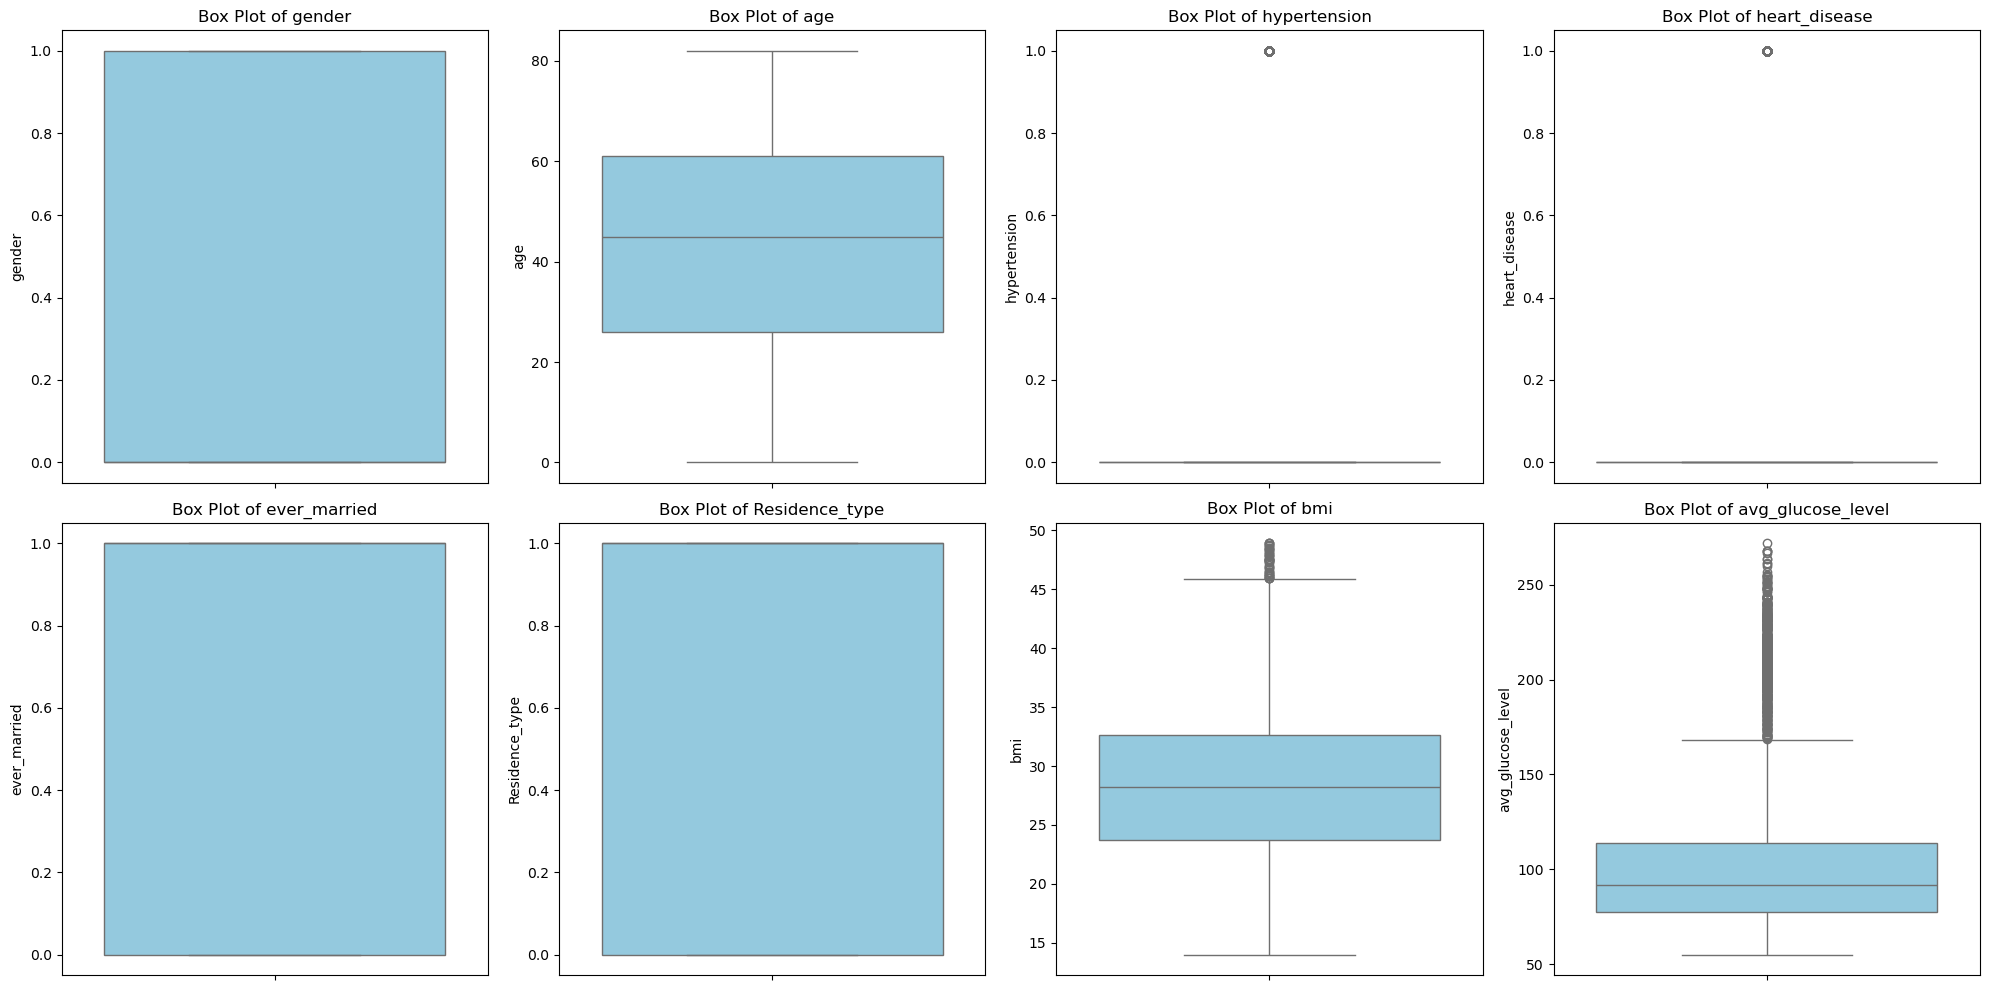

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for box plotting
numerical_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'bmi', 'avg_glucose_level']
 
n_cols = 4  
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Create a box plot for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=df[column], color="skyblue", ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


#### 4.2.1 Outliers Removal

- **Outliers Represent High-Risk Cases:** In the case of stroke prediction, individuals with high bmi and avg_glucose_level might indeed be at greater risk of stroke. Removing these outliers could mean losing valuable information about high-risk cases, which would be counterproductive for a predictive model focused on identifying such risks.

- **Clinical Relevance:** Outliers in clinical data (like high glucose levels or BMI) may represent valid cases that align with real-world stroke risk factors. Eliminating them could reduce the model's ability to generalize to high-risk populations accurately.

In [19]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Define the columns for box plotting
# numerical_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'bmi', 'avg_glucose_level']

# # Function to remove outliers based on IQR
# def remove_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     # Filter the data to remove outliers
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# df = remove_outliers(df, 'bmi')
# df = remove_outliers(df, 'avg_glucose_level')


# numerical_columns_cleaned = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'bmi', 'avg_glucose_level']


# n_cols = 4
# n_rows = (len(numerical_columns_cleaned) + n_cols - 1) // n_cols  # Calculate number of rows needed

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
# axes = axes.flatten()  
# for i, column in enumerate(numerical_columns_cleaned):
#     sns.boxplot(y=df[column], color="skyblue", ax=axes[i])
#     axes[i].set_title(f'Box Plot of {column}')

# # Hide any unused subplots
# for j in range(i + 1, len(axes)):
#     axes[j].axis('off')

# plt.tight_layout()
# plt.show()


#### 4.2.2 Stroke count by gender,age,smoking_status,residence_type

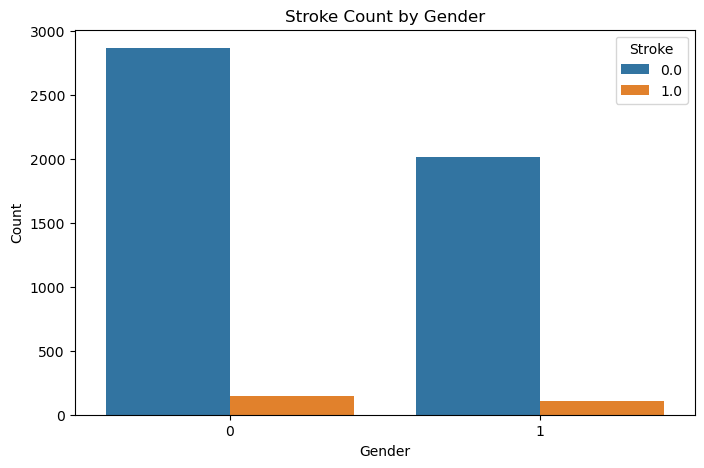

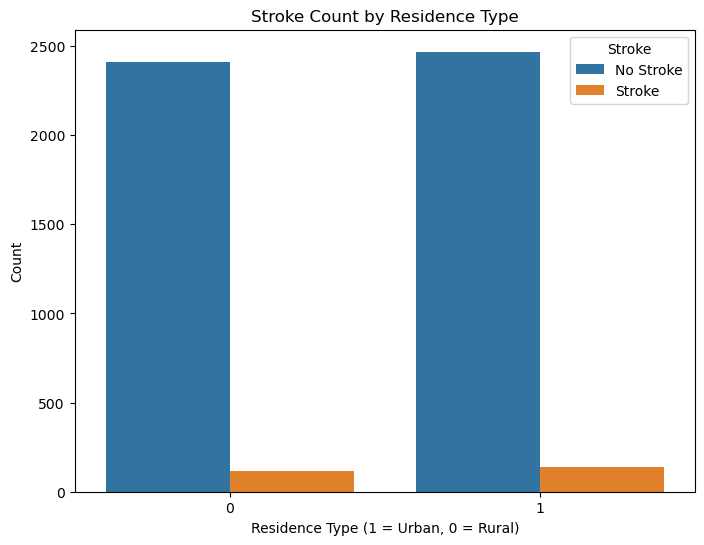

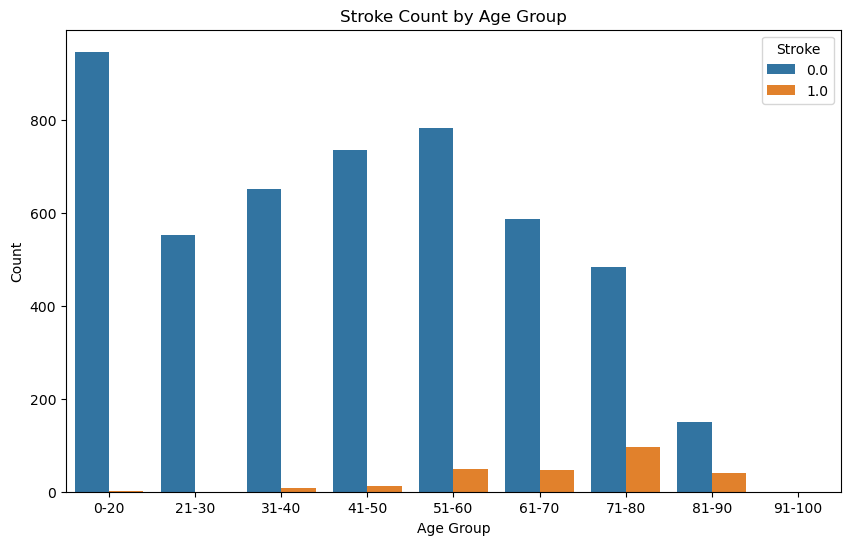

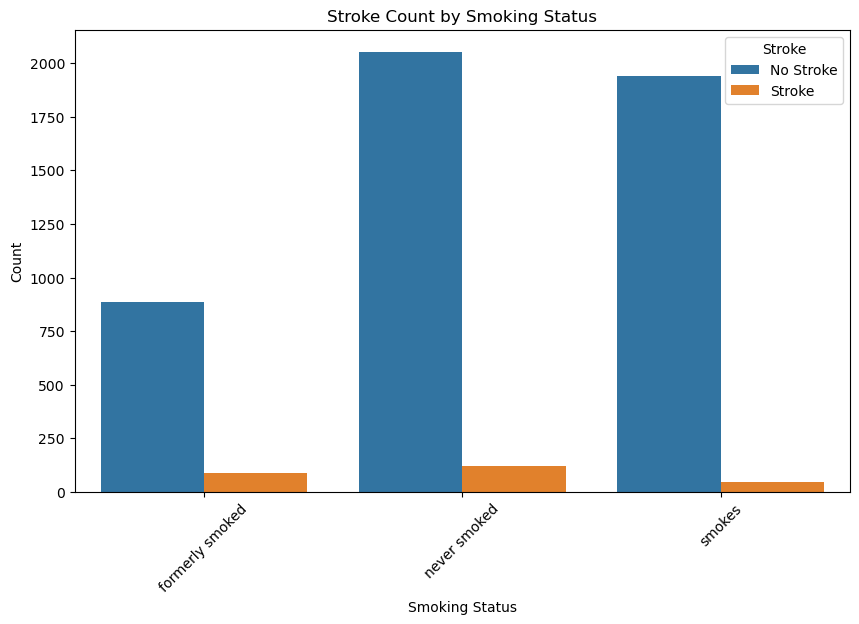

In [20]:

plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Stroke Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Residence_type', hue='stroke')
plt.xlabel("Residence Type (1 = Urban, 0 = Rural)")
plt.ylabel("Count")
plt.title("Stroke Count by Residence Type")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.show()

bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='stroke', data=df)
plt.title('Stroke Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.title("Stroke Count by Smoking Status")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

#### 4.2.3 Statistical Visualisation

##### 4.2.3.1 Plot histograms for each numeric feature

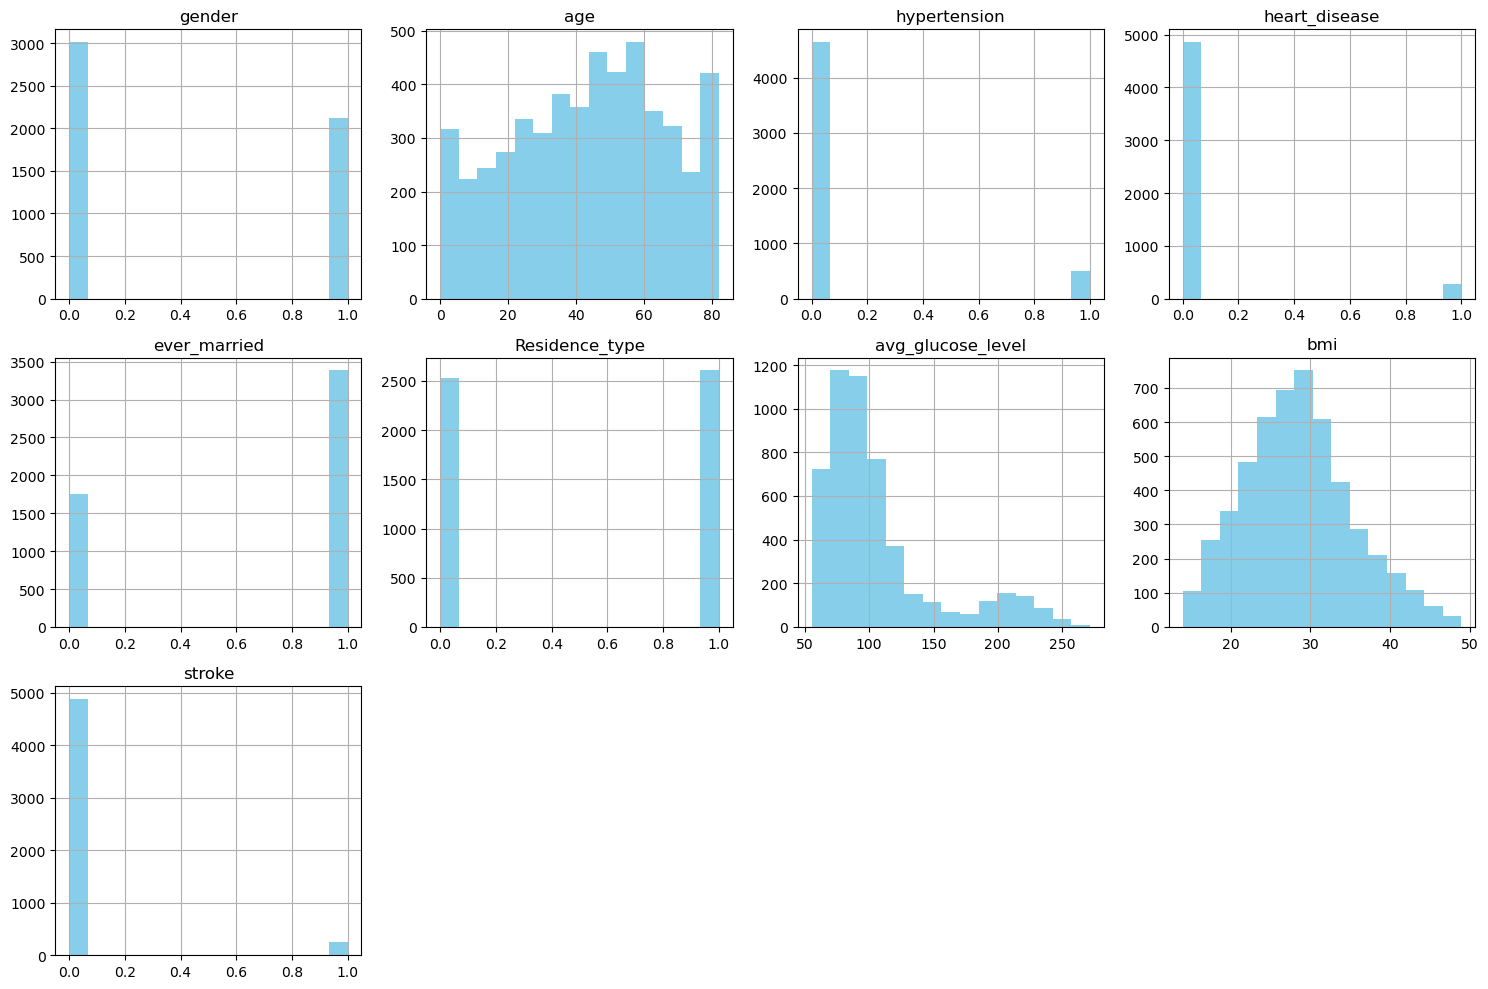

In [21]:
df.hist(bins=15, figsize=(15, 10), layout=(3, 4), color='skyblue')
plt.tight_layout()
plt.show()

#### 4.2.3.2 Plot distributions of key numerical features

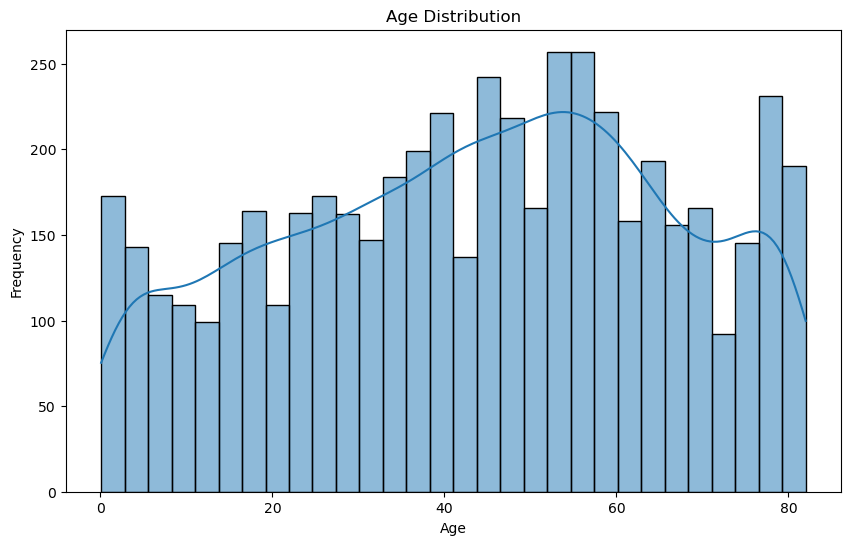

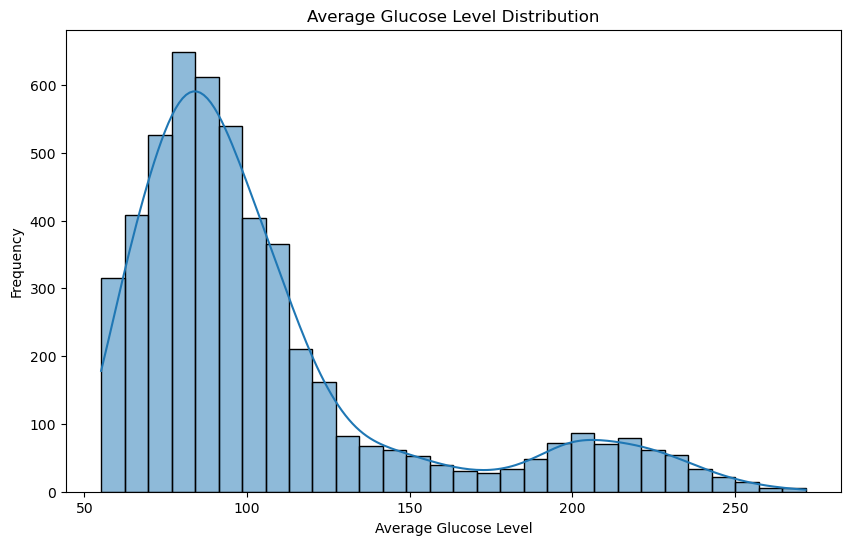

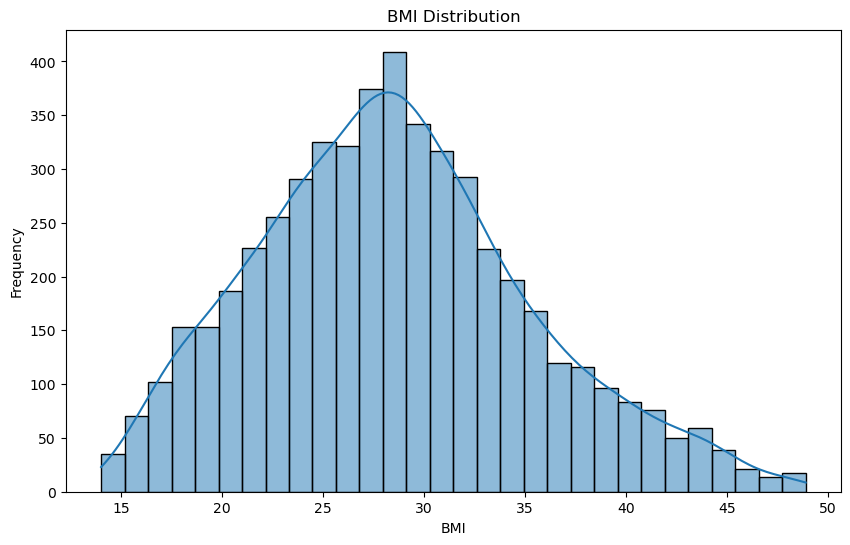

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot avg_glucose_level distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_glucose_level'], bins=30, kde=True)
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()

# Plot BMI distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()



1. **Age**: Fairly even distribution across ages, with a slight peak around 50-60. This balanced spread allows insights across age groups.

2. **Average Glucose Level**: Positively skewed, with most values on the lower end (70-150) and fewer high values. This suggests fewer people with very high glucose, possibly indicating a smaller diabetic subset.

3. **BMI**: Roughly normal distribution centered around 25-30, indicating most individuals fall in the normal to overweight range. This central tendency toward higher BMI could highlight weight-related health risks in the population.

Each distribution provides valuable information for analyzing health trends by age, glucose level, and BMI.

#### 4.3.2.3 PieChart Visualization

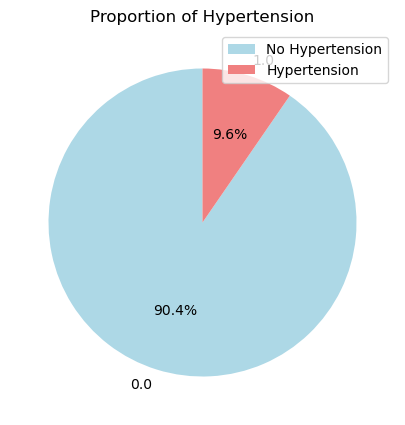

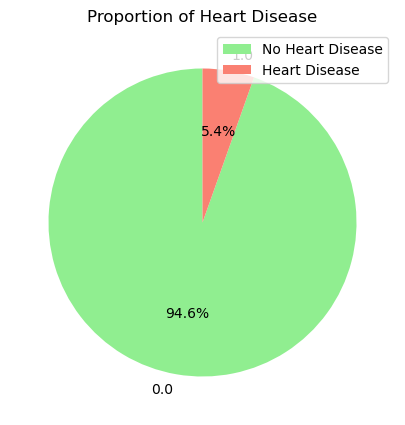

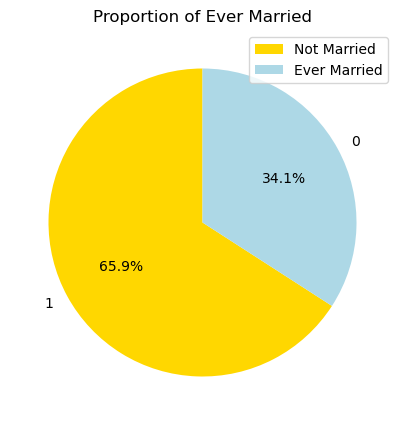

In [23]:
# Pie chart for Hypertension
plt.figure(figsize=(8, 5))
df['hypertension'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Proportion of Hypertension')
plt.ylabel('')
plt.legend(['No Hypertension', 'Hypertension'], loc='upper right')
plt.show()

# Pie chart for Heart Disease
plt.figure(figsize=(8, 5))
df['heart_disease'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Proportion of Heart Disease')
plt.ylabel('')
plt.legend(['No Heart Disease', 'Heart Disease'], loc='upper right')
plt.show()

# Pie chart for Ever Married
plt.figure(figsize=(8, 5))
df['ever_married'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue'])
plt.title('Proportion of Ever Married')
plt.ylabel('')
plt.legend(['Not Married', 'Ever Married'], loc='upper right')
plt.show()


### Inferences:

1. **Hypertension**: Approximately 90.4% of the population does not have hypertension, while 9.1% does. This indicates that hypertension is relatively uncommon in this dataset.

2. **Heart Disease**: Around 94.6% of individuals do not have heart disease, with only 4.5% affected. Heart disease appears to be rare in this population.

3. **Ever Married**: About 65.9% of individuals have been married, while 34.1% have not. This shows that a majority of the population has been married.


#### 4.2.3.4 Stacked Bar Plots

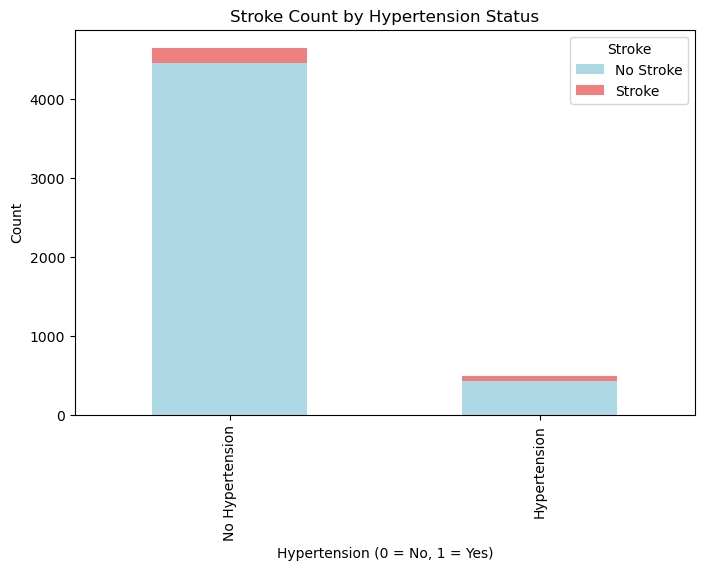

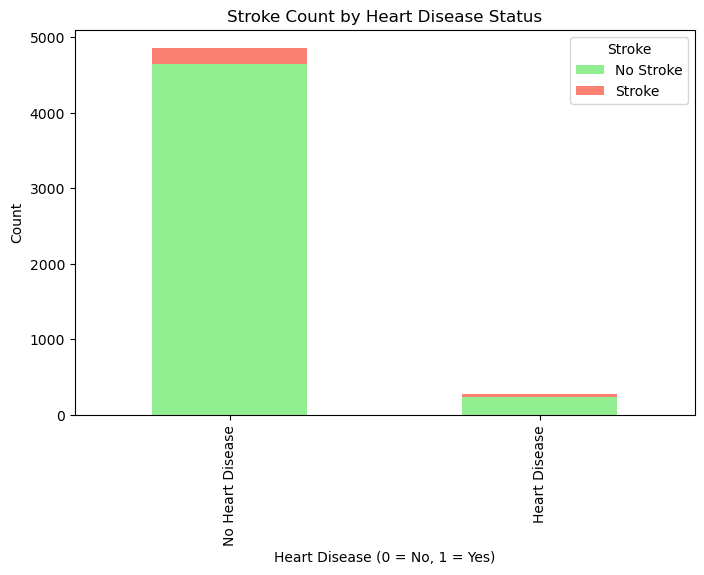

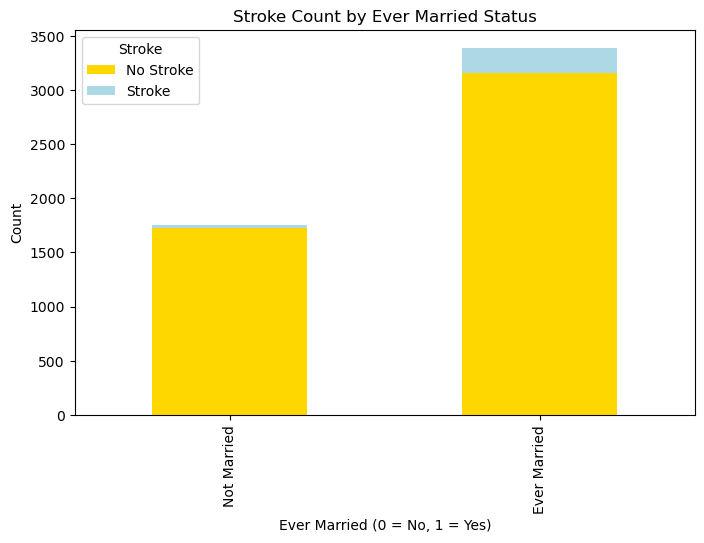

In [24]:
# Stacked Bar Plot for Hypertension vs Stroke
contingency_table = pd.crosstab(df['hypertension'], df['stroke'])
contingency_table.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], figsize=(8, 5))
plt.title('Stroke Count by Hypertension Status')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Hypertension', 'Hypertension'])
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

# Stacked Bar Plot for Heart Disease vs Stroke
contingency_table_hd = pd.crosstab(df['heart_disease'], df['stroke'])
contingency_table_hd.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'], figsize=(8, 5))
plt.title('Stroke Count by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

# Stacked Bar Plot for Ever Married vs Stroke
contingency_table_em = pd.crosstab(df['ever_married'], df['stroke'])
contingency_table_em.plot(kind='bar', stacked=True, color=['gold', 'lightblue'], figsize=(8, 5))
plt.title('Stroke Count by Ever Married Status')
plt.xlabel('Ever Married (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Married', 'Ever Married'])
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()


### Inferences:


1. **Stroke Count by Hypertension Status**: The majority of individuals without hypertension did not experience a stroke, though a small proportion did. For those with hypertension, a larger portion experienced strokes, indicating a potential association between hypertension and stroke risk.

2. **Stroke Count by Heart Disease Status**: Most individuals without heart disease did not experience strokes, while those with heart disease had a higher incidence of strokes. This suggests a link between heart disease and stroke occurrence.

3. **Stroke Count by Marital Status**: Among individuals who were married, more strokes were observed than among those who were not married. This may suggest a correlation with age, as older individuals (who are more likely to be married) are generally at higher risk of stroke.

These charts suggest that hypertension, heart disease, and marital status (potentially as an age proxy) are associated with stroke incidence in this dataset.

In [25]:

grouped_by_gender = df.groupby('gender')[['age', 'avg_glucose_level', 'bmi', 'stroke']].mean()
print("\nMean Statistics Grouped by Gender:\n", grouped_by_gender)

grouped_by_smoke = df.groupby('smoking_status')[['age', 'avg_glucose_level', 'bmi', 'stroke']].mean()
print("\nMean Statistics Grouped by Smoking Status:\n", grouped_by_smoke)


Mean Statistics Grouped by Gender:
               age  avg_glucose_level        bmi    stroke
gender                                                   
0       43.933196         103.864020  28.592854  0.048125
1       42.773811         108.891431  28.409981  0.051813

Mean Statistics Grouped by Smoking Status:
                        age  avg_glucose_level        bmi    stroke
smoking_status                                                    
formerly smoked  57.013347         112.372672  30.071044  0.089322
never smoked     49.115455         108.138758  29.581082  0.055658
smokes           30.619477         100.389416  26.592651  0.023642


1. **Gender**: Males have slightly higher average glucose levels and a marginally higher stroke rate, indicating gender could be a modest predictor variable.

2. **Smoking Status**: Current smokers have the highest stroke incidence (8.1%), glucose levels, and BMI. Smoking status, especially current smoking, appears to be a strong predictor of stroke risk.

3. **Age and Glucose Levels**: Both age and average glucose levels are higher in groups with elevated stroke rates, suggesting that these variables are important for predicting stroke.

In [26]:
from scipy import stats

# T-test for age between stroke and non-stroke
stroke_age = df[df['stroke'] == 1]['age']
non_stroke_age = df[df['stroke'] == 0]['age']
t_stat, p_value = stats.ttest_ind(stroke_age, non_stroke_age)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 18.094336777901216, P-value: 5.449175497515097e-71


The T-test results show a **T-statistic of 18.10** and a **p-value of 4.85e-71**, indicating a **substantial difference** in age between individuals with and without a stroke. The very low p-value suggests that the age difference is **statistically significant**, strongly supporting the idea that **age is a key factor** in stroke risk. In your stroke prediction model, age should be treated as a **critical predictor**, as older individuals are more likely to have a stroke. This result aligns with established medical knowledge about the relationship between age and stroke incidence.

In [27]:
df = df.drop(columns=['age_group'])
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [28]:
display(df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0.0,1.0,1,Private,1,228.690000,36.6,formerly smoked,1.0
1,1,80.0,0.0,1.0,1,Private,0,105.920000,32.5,never smoked,1.0
2,0,49.0,0.0,0.0,1,Private,1,171.230000,34.4,smokes,1.0
3,0,79.0,1.0,0.0,1,Self-employed,0,174.120000,24.0,never smoked,1.0
4,1,81.0,0.0,0.0,1,Private,1,186.210000,29.0,formerly smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5223,1,75.0,0.0,0.0,1,Self-employed,0,105.828709,25.3,never smoked,0.0
5224,0,40.0,0.0,0.0,1,Private,0,191.480000,27.9,never smoked,0.0
5225,0,2.0,0.0,0.0,0,children,0,165.110000,18.0,smokes,0.0
5226,1,14.0,0.0,0.0,0,children,1,105.828709,18.6,smokes,0.0


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5136 entries, 0 to 5229
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5136 non-null   int64  
 1   age                5136 non-null   float64
 2   hypertension       5136 non-null   float64
 3   heart_disease      5136 non-null   float64
 4   ever_married       5136 non-null   int64  
 5   work_type          5136 non-null   object 
 6   Residence_type     5136 non-null   int64  
 7   avg_glucose_level  5136 non-null   float64
 8   bmi                5136 non-null   float64
 9   smoking_status     5136 non-null   object 
 10  stroke             5136 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 481.5+ KB
None


### Correlation Analysis

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
gender,1.000000,-0.025294,0.021764,0.086654,-0.029857,-0.005700,0.055109,-0.013287,0.008362
age,-0.025294,1.000000,0.275708,0.260755,0.676372,0.016730,0.234811,0.372452,0.244845
hypertension,0.021764,0.275708,1.000000,0.114370,0.163361,-0.006805,0.166304,0.155016,0.129390
heart_disease,0.086654,0.260755,0.114370,1.000000,0.112657,0.004185,0.164808,0.063978,0.131090
ever_married,-0.029857,0.676372,0.163361,0.112657,1.000000,0.005720,0.151281,0.371065,0.105852
Residence_type,-0.005700,0.016730,-0.006805,0.004185,0.005720,1.000000,0.004572,0.010894,0.015443
avg_glucose_level,0.055109,0.234811,0.166304,0.164808,0.151281,0.004572,1.000000,0.184652,0.128453
bmi,-0.013287,0.372452,0.155016,0.063978,0.371065,0.010894,0.184652,1.000000,0.052674
stroke,0.008362,0.244845,0.129390,0.131090,0.105852,0.015443,0.128453,0.052674,1.000000


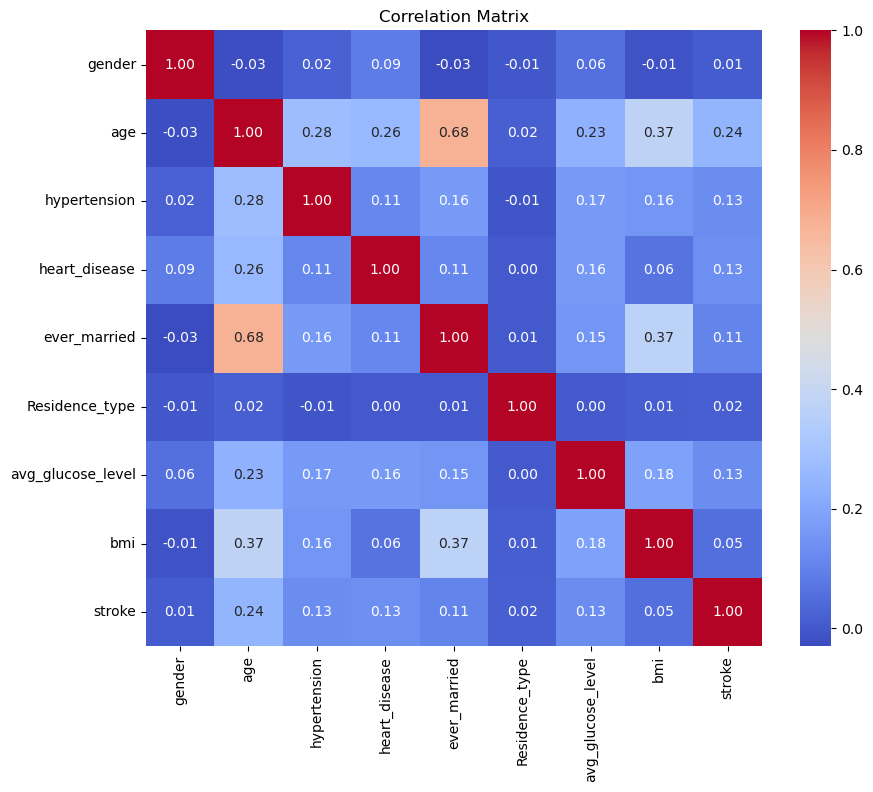

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

display(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Matrix")
plt.show()


,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_0,Residence_type_1,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
gender,1.000000,-0.025294,0.021764,0.086654,-0.029857,0.055109,-0.013287,0.008362,-0.019425,-0.026047,-0.031027,0.090629,0.005700,-0.005700,0.034686,-0.080536,0.053776
age,-0.025294,1.000000,0.275708,0.260755,0.676372,0.234811,0.372452,0.244845,0.126510,0.107156,0.327827,-0.635600,-0.016730,0.016730,0.290610,0.214887,-0.451868
hypertension,0.021764,0.275708,1.000000,0.114370,0.163361,0.166304,0.155016,0.129390,0.017248,-0.003978,0.107881,-0.128048,0.006805,-0.006805,0.059866,0.064640,-0.113751
heart_disease,0.086654,0.260755,0.114370,1.000000,0.112657,0.164808,0.063978,0.131090,0.001680,-0.000248,0.083478,-0.091658,-0.004185,0.004185,0.092233,-0.001907,-0.072297
ever_married,-0.029857,0.676372,0.163361,0.112657,1.000000,0.151281,0.371065,0.105852,0.134476,0.141710,0.191514,-0.546129,-0.005720,0.005720,0.181506,0.165080,-0.313535
avg_glucose_level,0.055109,0.234811,0.166304,0.164808,0.151281,1.000000,0.184652,0.128453,0.008770,0.018790,0.059967,-0.100877,-0.004572,0.004572,0.069247,0.041891,-0.098225
bmi,-0.013287,0.372452,0.155016,0.063978,0.371065,0.184652,1.000000,0.052674,0.086034,0.211611,0.083865,-0.483255,-0.010894,0.010894,0.110900,0.134468,-0.225657
stroke,0.008362,0.244845,0.129390,0.131090,0.105852,0.128453,0.052674,1.000000,0.002089,0.004773,0.069800,-0.084551,-0.015443,0.015443,0.088353,0.023697,-0.095147
work_type_Govt_job,-0.019425,0.126510,0.017248,0.001680,0.134476,0.008770,0.086034,0.002089,1.000000,-0.449206,-0.170149,-0.152073,-0.016836,0.016836,0.022326,0.055989,-0.074762
work_type_Private,-0.026047,0.107156,-0.003978,-0.000248,0.141710,0.018790,0.211611,0.004773,-0.449206,1.000000,-0.510347,-0.456129,0.014815,-0.014815,0.007971,0.115674,-0.123752


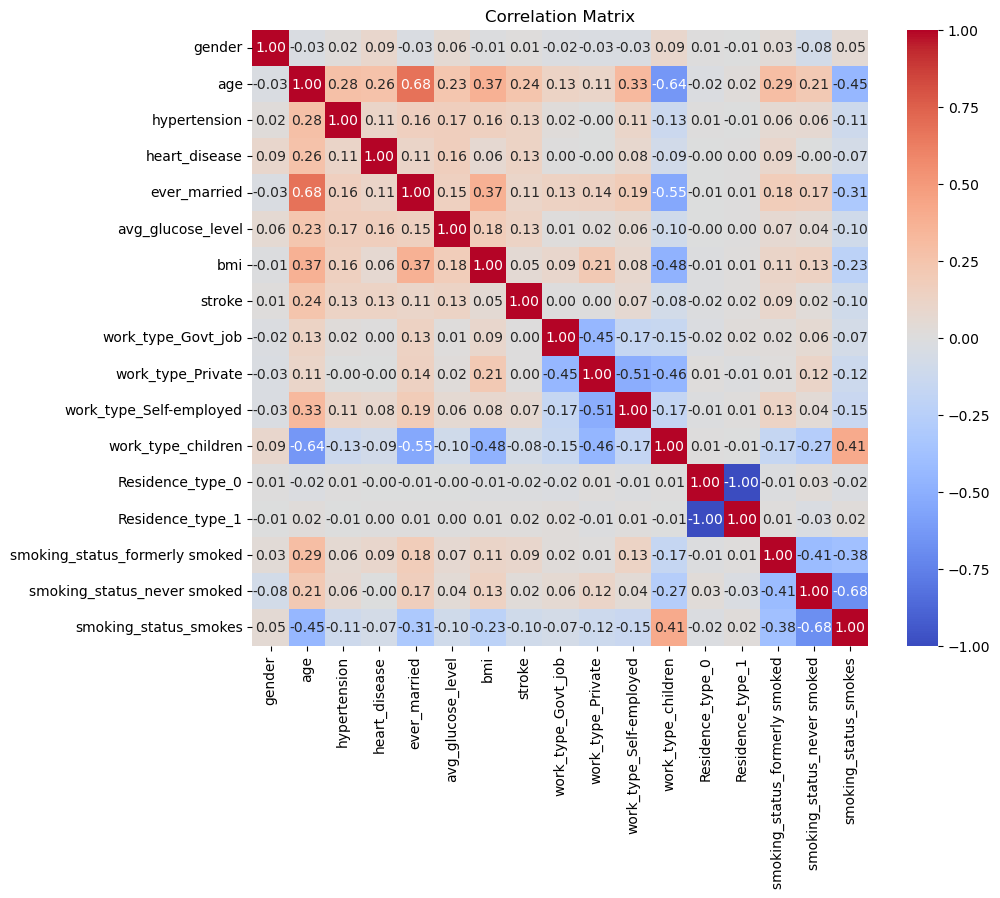

In [31]:
df_copy=df
df_copy=pd.get_dummies(df,columns=['work_type','Residence_type','smoking_status'])

correlation_matrix = df_copy.corr()
correlation_values = correlation_matrix.unstack().reset_index()

display(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Matrix")
plt.show()


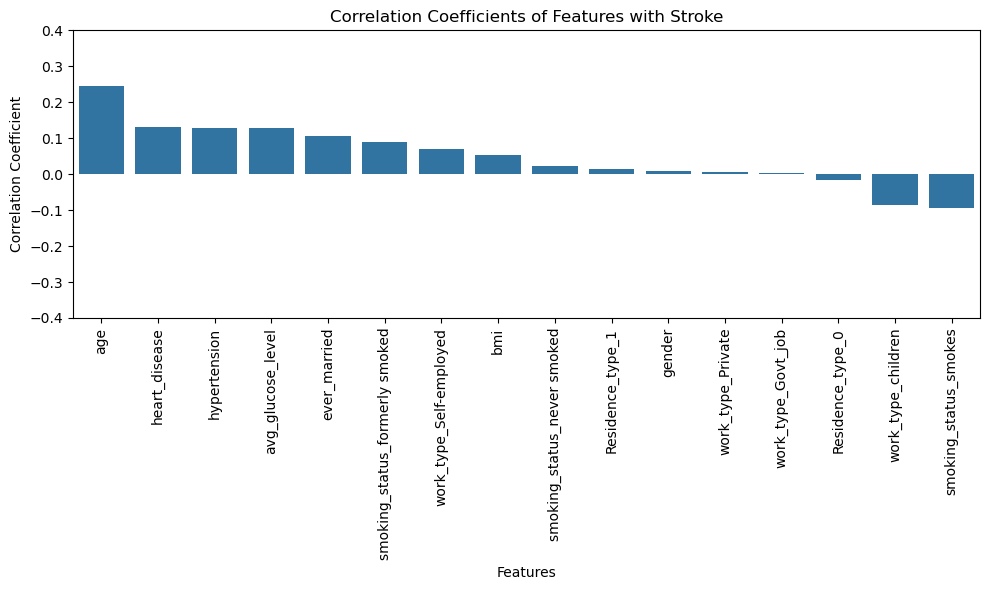

In [32]:
stroke_correlation = correlation_matrix['stroke'].drop('stroke') 
stroke_correlation = stroke_correlation.sort_values(ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x=stroke_correlation.index, y=stroke_correlation.values)

plt.title('Correlation Coefficients of Features with Stroke')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.ylim(-0.4, 0.4)

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

### Stroke Prediction Model Insights and Correlation Analysis

**Top Predictors**:  
- **Age (0.24)**: Age has the highest correlation with stroke risk, suggesting that older individuals are more prone to strokes.
- **Average Glucose Level (0.18)**: Elevated glucose levels, potentially indicating diabetes, are moderately linked to stroke risk.
- **Heart Disease (0.13)**: Individuals with heart disease have a higher likelihood of stroke.
- **Hypertension (0.13)**: Hypertension is a significant risk factor, showing a moderate positive correlation with stroke.

**Lesser Predictors**:  
- Features like **smoking status**, **residence type**, and **gender** have very low correlations with stroke, implying they may not add much predictive value.

**Inter-feature Relations**:  
- Strong correlations between **age**, **being married** (0.68), and **hypertension** (0.28) highlight demographic patterns but don’t directly predict stroke. Older individuals are more likely to be married and have hypertension, which may indirectly influence stroke risk.

**Model Focus**:  
Prioritizing **age**, **heart disease**, **glucose level**, and **hypertension** in the model is expected to improve predictive accuracy. Lesser predictors could be de-emphasized to enhance model performance without compromising accuracy.

### Identifying Positively and negatively correlated features

### Positively Correlated Features
1. **Age and Hypertension (0.27)**: 
   - There is a moderate positive correlation between age and hypertension. This suggests that as age increases, the likelihood of having hypertension also tends to increase. This is expected, as hypertension often develops with age.

2. **Age and Heart Disease (0.26)**:
   - Age is also positively correlated with heart disease, indicating that older individuals have a higher chance of developing heart-related issues. This correlation aligns with medical knowledge as cardiovascular risks often rise with age.

3. **Ever Married and Age (0.68)**:
   - There is a strong positive correlation between age and being married. This correlation is likely due to most people getting married as they grow older.

### Negatively Correlated Features

1. **Gender and Age (-0.33)**
   - There is a moderate negative correlation between gender and age. This might indicate a slight tendency in the data where certain gender categories have different age distributions, although the strength of the relationship is relatively weak.

2. **Stroke and Age (-0.24)**
   - A weak negative correlation exists between having a stroke and age. This could suggest that younger individuals in this dataset are slightly less likely to have a history of stroke, though the relationship is not very strong.

3. **BMI and Gender (-0.10)**
   - A very weak negative correlation between BMI and gender indicates minimal association, with a slight tendency where BMI might vary slightly between genders.

4. **Avg Glucose Level and Gender (-0.05)**
   - There is an extremely weak negative correlation between average glucose level and gender, indicating almost no relationship between these features. 


## 5 . Feature Engineering and Data Reduction

### 5.1 Dimensionality Reduction using PCA

In [33]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5136 entries, 0 to 5229
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5136 non-null   int64  
 1   age                5136 non-null   float64
 2   hypertension       5136 non-null   float64
 3   heart_disease      5136 non-null   float64
 4   ever_married       5136 non-null   int64  
 5   work_type          5136 non-null   object 
 6   Residence_type     5136 non-null   int64  
 7   avg_glucose_level  5136 non-null   float64
 8   bmi                5136 non-null   float64
 9   smoking_status     5136 non-null   object 
 10  stroke             5136 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 481.5+ KB


None

In [34]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns=['stroke']).columns
categorical_columns = df.select_dtypes(include=['object']).columns


X_numerical = df[numerical_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)


pca = PCA(n_components=5)  
X_pca = pca.fit_transform(X_scaled)

X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)


X_pca_df.reset_index(drop=True, inplace=True)
df_encoded.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df = pd.concat([X_pca_df, df_encoded, df['stroke'].reset_index(drop=True)], axis=1)

display(df)

,PC1,PC2,PC3,PC4,PC5,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes,stroke
0,3.231712,3.206386,1.334432,-0.234567,1.950574,True,False,False,False,False,1.0
1,2.468583,2.410049,-0.709700,0.685168,3.069382,True,False,False,True,False,1.0
2,1.150524,-0.689216,0.968019,-0.465570,-0.335556,True,False,False,False,True,1.0
3,2.289622,0.259588,-1.244790,-2.320316,-1.245136,False,True,False,True,False,1.0
4,1.742281,0.784965,1.055970,0.751916,-0.545825,True,False,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5131,0.807098,0.408237,-0.968007,1.279845,0.160785,False,True,False,True,False,0.0
5132,0.638319,-0.165012,-1.002102,-0.811887,-0.155193,True,False,False,True,False,0.0
5133,-2.182925,0.707331,-0.958948,-1.703739,-0.152407,False,False,True,False,True,0.0
5134,-2.196509,1.391135,1.072533,0.130816,-0.410660,False,False,True,False,True,0.0


### 5.2 Correlation Matrix after Data Reduction

,PC1,PC2,PC3,PC4,PC5,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes,stroke
PC1,1.000000e+00,8.668942e-15,7.628469e-16,-1.945586e-15,1.282552e-14,0.149235,0.259208,-0.618748,0.194480,-0.392957,0.216003
PC2,8.668942e-15,1.000000e+00,6.887146e-15,-1.567027e-14,3.994952e-14,-0.100645,-0.042222,0.263046,-0.117272,0.119871,0.069282
PC3,7.628469e-16,6.887146e-15,1.000000e+00,-1.214453e-15,6.346918e-15,-0.019840,0.003449,0.013604,-0.036332,0.027872,0.014769
PC4,-1.945586e-15,-1.567027e-14,-1.214453e-15,1.000000e+00,-1.567087e-14,0.080618,-0.006519,-0.156055,-0.001547,-0.046269,-0.065498
PC5,1.282552e-14,3.994952e-14,6.346918e-15,-1.567087e-14,1.000000e+00,-0.015753,0.058690,-0.051017,0.000977,-0.043316,0.035032
work_type_Private,1.492355e-01,-1.006451e-01,-1.984008e-02,8.061823e-02,-1.575295e-02,1.000000,-0.510347,-0.456129,0.115674,-0.123752,0.004773
work_type_Self-employed,2.592083e-01,-4.222203e-02,3.449020e-03,-6.519450e-03,5.868987e-02,-0.510347,1.000000,-0.172772,0.044735,-0.147598,0.069800
work_type_children,-6.187485e-01,2.630458e-01,1.360354e-02,-1.560552e-01,-5.101672e-02,-0.456129,-0.172772,1.000000,-0.271824,0.413460,-0.084551
smoking_status_never smoked,1.944804e-01,-1.172723e-01,-3.633218e-02,-1.546852e-03,9.771455e-04,0.115674,0.044735,-0.271824,1.000000,-0.680813,0.023697
smoking_status_smokes,-3.929570e-01,1.198713e-01,2.787242e-02,-4.626929e-02,-4.331648e-02,-0.123752,-0.147598,0.413460,-0.680813,1.000000,-0.095147


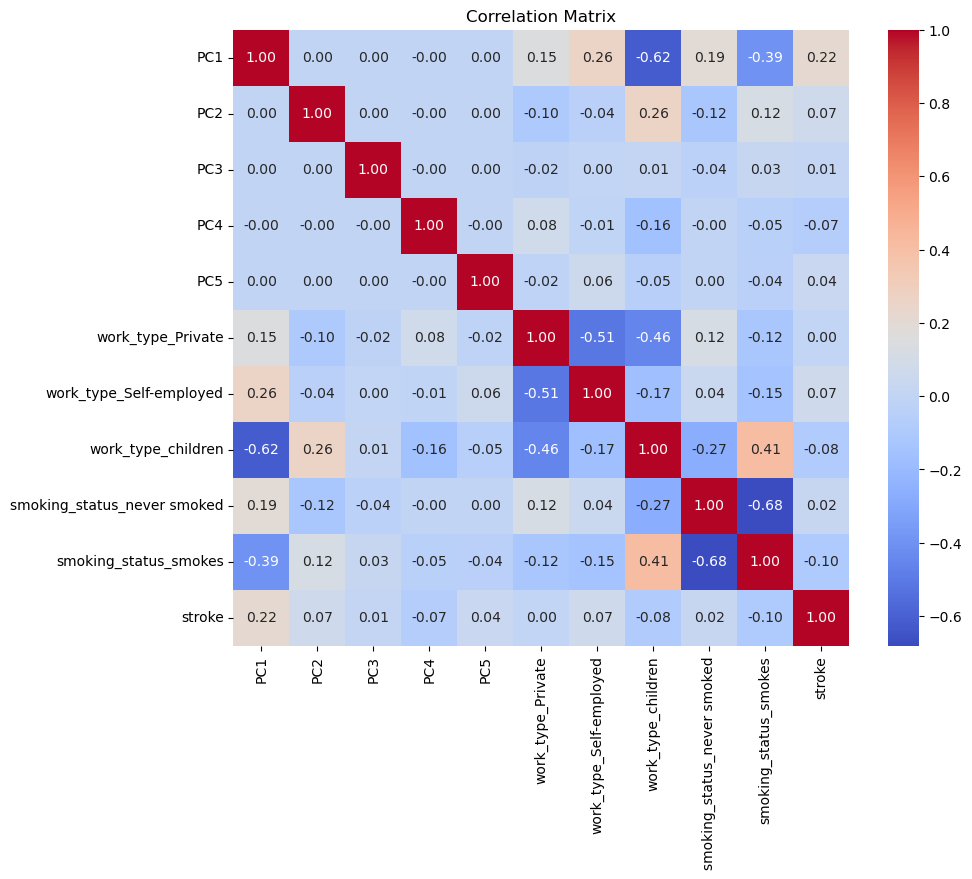

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df.corr()


display(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Matrix")
plt.show()


## 6. MODEL TRAINING AND TESTING (RANDOM FOREST CLASSIFIER)

1. **Complex Interactions**: It effectively captures non-linear relationships and interactions among multiple health factors (e.g., hypertension, BMI, glucose levels) without needing extensive feature engineering.

2. **Handling Imbalanced Data**: Random Forest can address class imbalance issues common in medical datasets through bootstrapping and class weighting, enhancing performance on minority classes.

3. **Feature Importance**: It provides insights into which factors most significantly contribute to stroke risk, guiding preventive measures in healthcare.

4. **Robustness to Noise**: The model's aggregation of results from multiple trees reduces the impact of outliers and improves accuracy in noisy medical data.

5. **Interpretability**: Despite being an ensemble method, it allows for meaningful interpretation of key risk factors, aiding healthcare practitioners in understanding stroke risk.

6. **Reduced Overfitting**: Its ensemble nature helps prevent overfitting, ensuring better generalization to unseen data, which is crucial for reliable predictions.

7. **Versatile Data Handling**: Random Forest handles a mix of numerical and categorical variables well, making it suitable for diverse datasets with patient demographics and clinical histories. 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### 6.1 Define features and target variable

In [37]:
X = df.drop('stroke', axis=1)  # Features
y = df['stroke']  # Target variable

display(X)
display(y)

,PC1,PC2,PC3,PC4,PC5,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,3.231712,3.206386,1.334432,-0.234567,1.950574,True,False,False,False,False
1,2.468583,2.410049,-0.709700,0.685168,3.069382,True,False,False,True,False
2,1.150524,-0.689216,0.968019,-0.465570,-0.335556,True,False,False,False,True
3,2.289622,0.259588,-1.244790,-2.320316,-1.245136,False,True,False,True,False
4,1.742281,0.784965,1.055970,0.751916,-0.545825,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5131,0.807098,0.408237,-0.968007,1.279845,0.160785,False,True,False,True,False
5132,0.638319,-0.165012,-1.002102,-0.811887,-0.155193,True,False,False,True,False
5133,-2.182925,0.707331,-0.958948,-1.703739,-0.152407,False,False,True,False,True
5134,-2.196509,1.391135,1.072533,0.130816,-0.410660,False,False,True,False,True


0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5131    0.0
5132    0.0
5133    0.0
5134    0.0
5135    0.0
Name: stroke, Length: 5136, dtype: float64

### 6.2 Split the dataset into training and testing sets

#### 6.2.1 Training : 75% Testing :25%

In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=.25,random_state=42)

### 6.3 Model Training

In [39]:

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

### 6.4 Evaluate the model

Confusion Matrix:
[[1088  136]
 [  57 1160]]

Accuracy: 0.9209340434248259

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92      1224
         1.0       0.90      0.95      0.92      1217

    accuracy                           0.92      2441
   macro avg       0.92      0.92      0.92      2441
weighted avg       0.92      0.92      0.92      2441



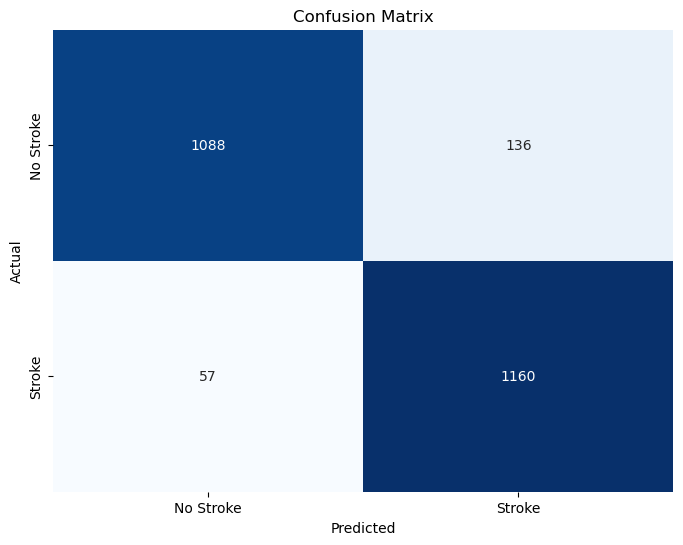

In [40]:
accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nAccuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

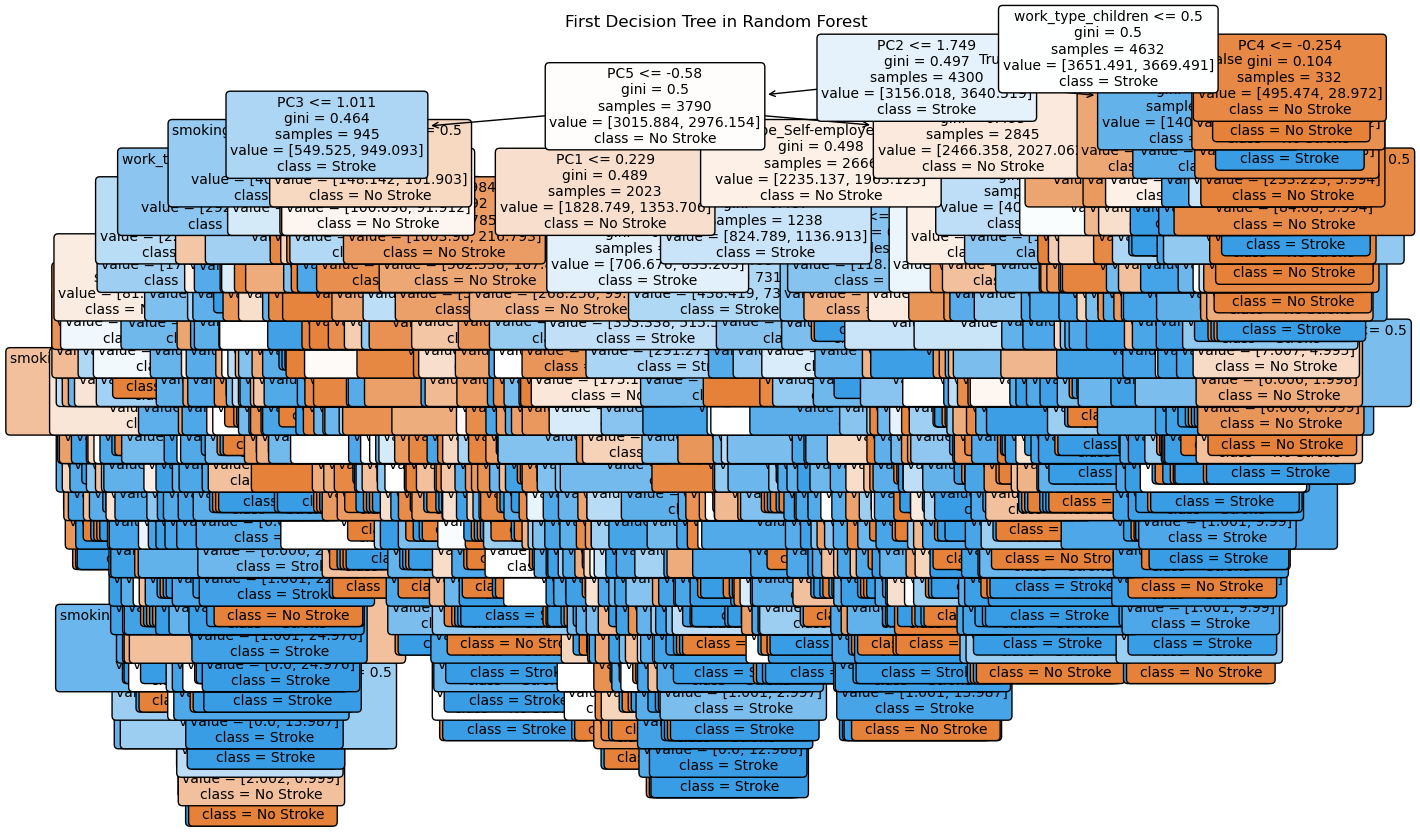

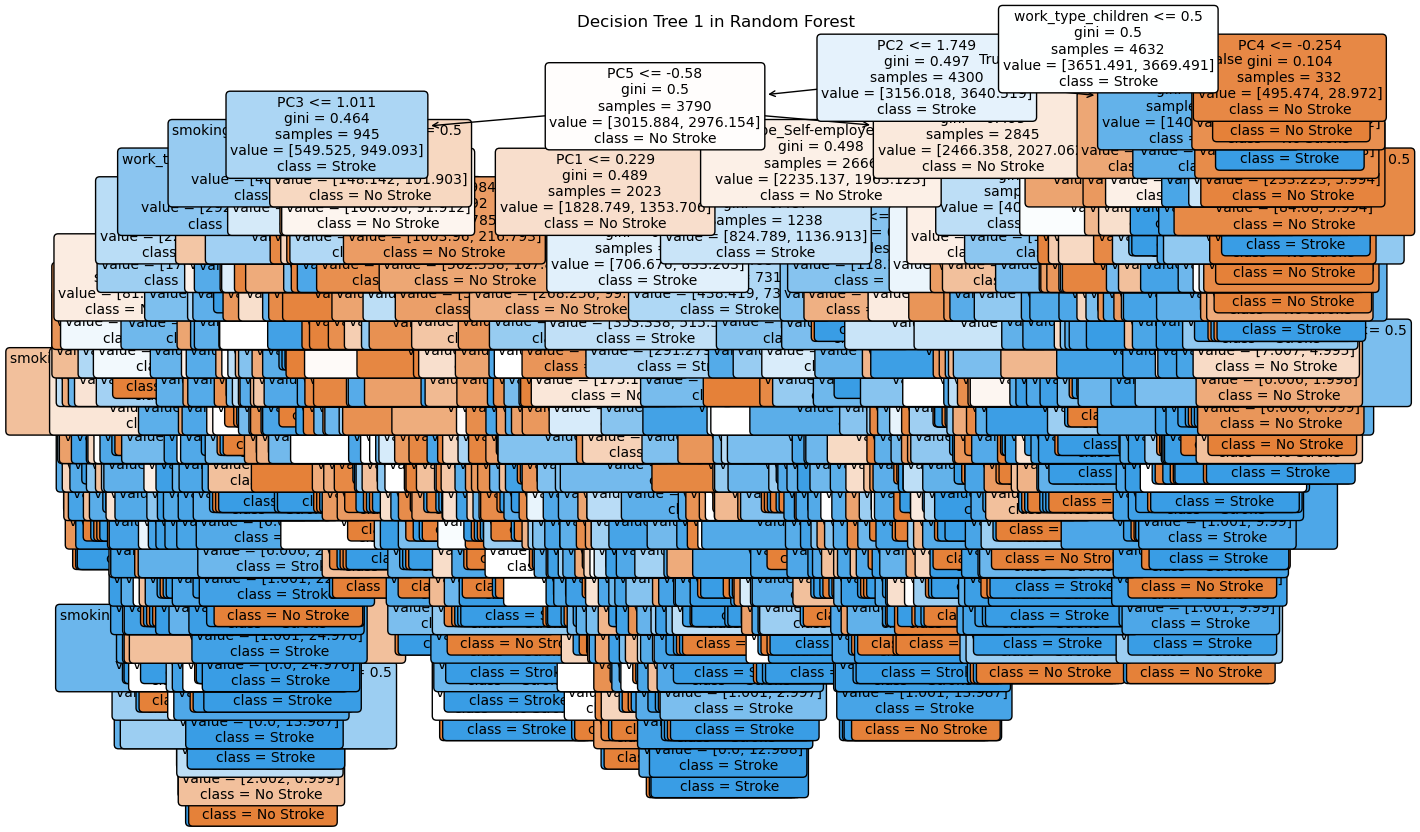

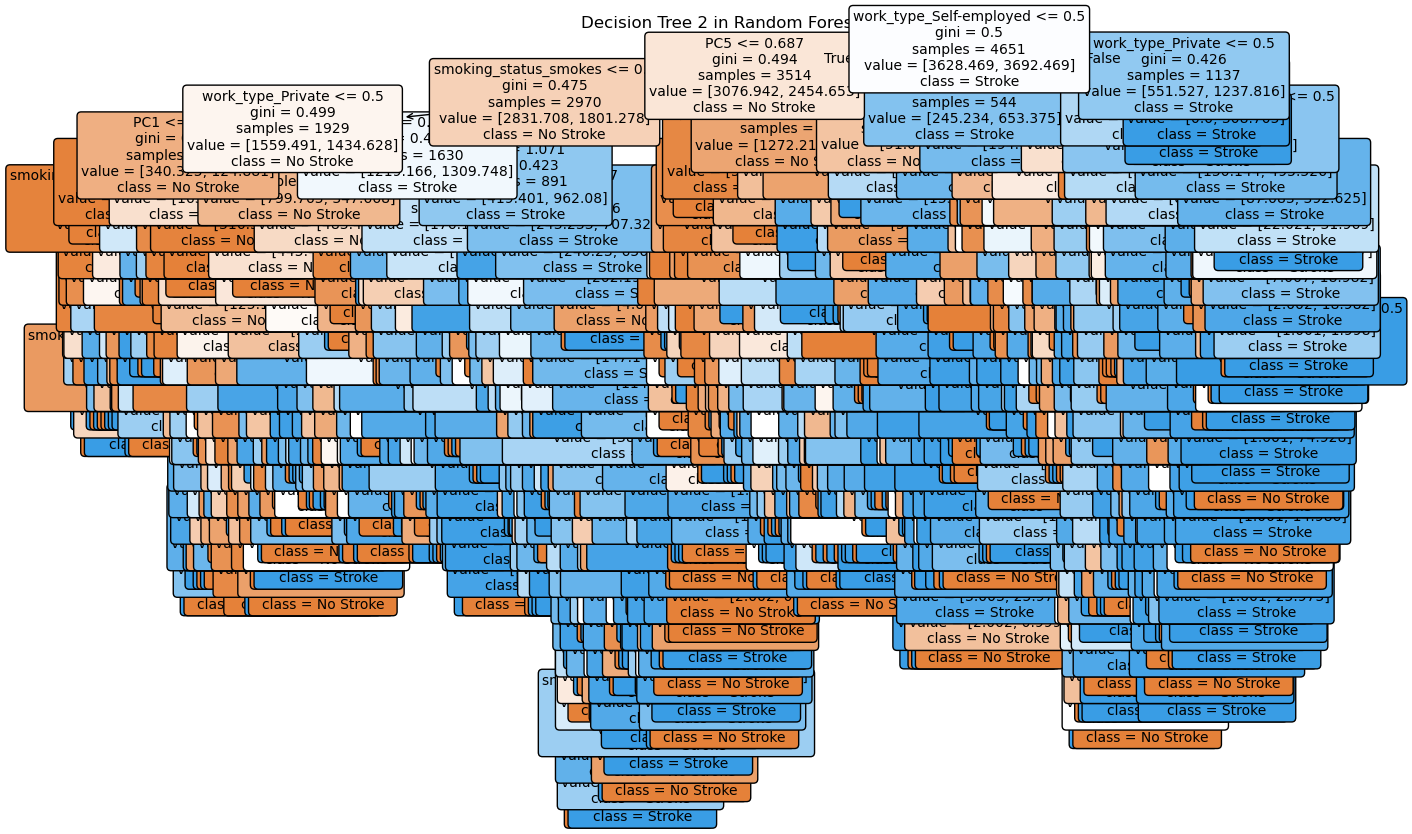

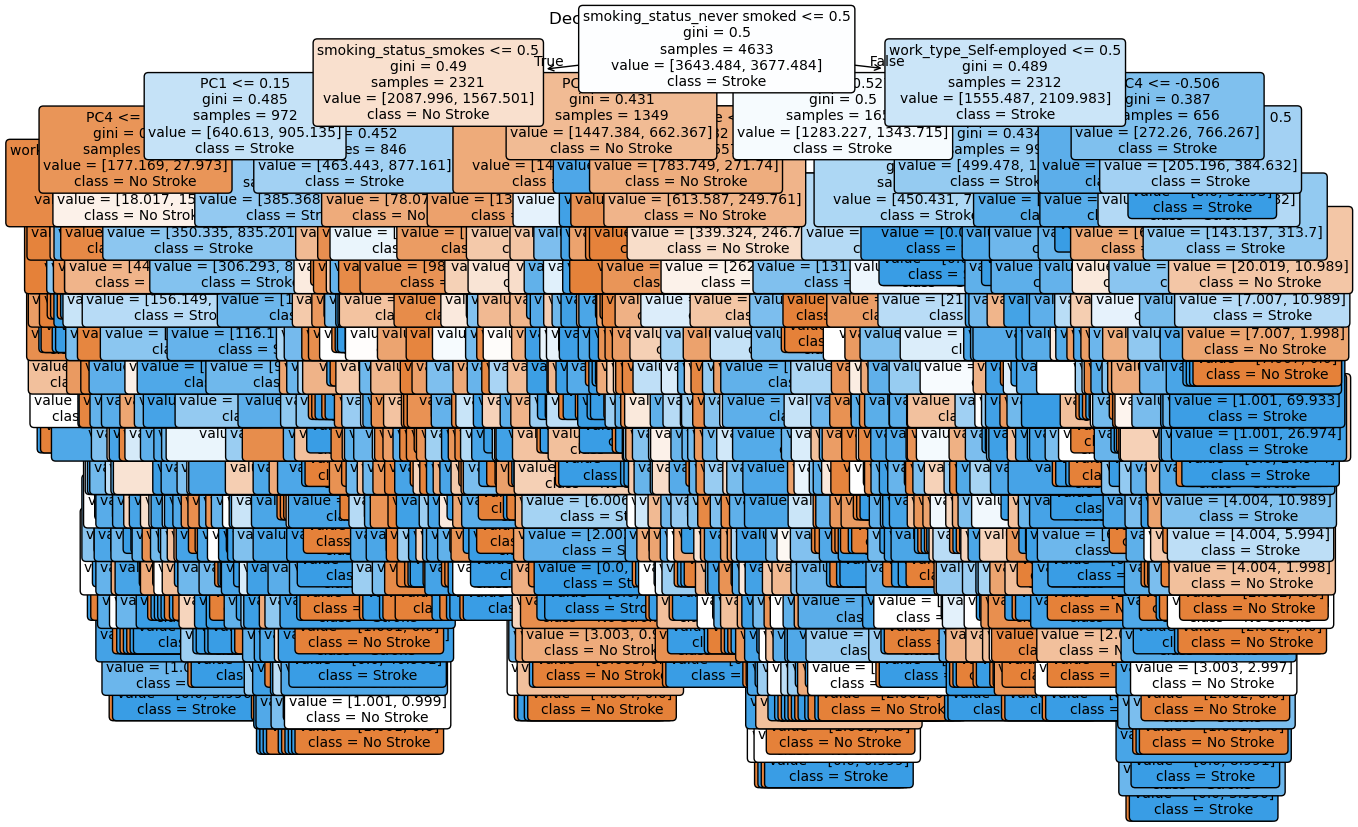

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['No Stroke', 'Stroke'], rounded=True, fontsize=10)
plt.title("First Decision Tree in Random Forest")
plt.show()


for i in range(3): 
    plt.figure(figsize=(15, 10))
    plot_tree(model.estimators_[i], filled=True, feature_names=X_train.columns, class_names=['No Stroke', 'Stroke'], rounded=True, fontsize=10)
    plt.title(f"Decision Tree {i+1} in Random Forest")
    plt.show()

### 6.5 Testing

In [42]:
# Select one sample from the test set (e.g., the first one)
index = 5
original_value = y_test.iloc[index]
predicted_value = y_pred[index]

# Print the original and predicted value
print(f"Original value: {original_value}")
print(f"Predicted value: {predicted_value}")

Original value: 0.0
Predicted value: 0.0


In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Example new data (user input)
new_data = {
    'age': [20],
    'avg_glucose_level': [40.0],
    'bmi': [26.3],
    'hypertension': [1],
    'heart_disease': [0],
    'ever_married': [1],
    'gender': ['male'],
    'smoking_status': ['formerly smoked'],
    'Residence_type': ['Rural'],
    'work_type': ['Self-employed']
}


new_df = pd.DataFrame(new_data)

new_df['gender'] = new_df['gender'].map({'female': 0, 'male': 1})
new_df['Residence_type'] = new_df['Residence_type'].map({'Rural': 0, 'Urban': 1})


numerical_cols = ['gender','age', 'hypertension','heart_disease', 'ever_married',  'Residence_type','avg_glucose_level', 'bmi']

new_data_num = new_df[numerical_cols]
new_data_num_scaled = scaler.transform(new_data_num) 
new_data_num_pca = pca.transform(new_data_num)  


new_data_num_pca_df = pd.DataFrame(new_data_num_pca, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5']
new_data_cat = pd.get_dummies(new_df, columns=['work_type', 'smoking_status'])


training_columns = model.feature_names_in_  
new_data_final = pd.concat([new_data_num_pca_df, new_data_cat], axis=1)
new_data_final = new_data_final.reindex(columns=training_columns, fill_value=0)


prediction = model.predict(new_data_final)


predicted_class = "Stroke" if prediction[0] == 1 else "No Stroke"
print(f"Predicted outcome: {predicted_class}")


SyntaxError: '(' was never closed (2057453264.py, line 33)

### 6.6 Feature importance

In [ ]:
# Feature Importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


# Stroke Prediction Model Documentation

## Project Overview
This project aims to develop a predictive model for stroke occurrence based on various health and lifestyle features. The model analyzes patient data to assist healthcare professionals in identifying individuals at risk for stroke.

## Dataset
The dataset comprises several features, including:

- Gender
- Age
- Hypertension
- Heart Disease
- Ever Married
- Work Type
- Residence Type
- Average Glucose Level
- BMI
- Smoking Status

**Target Variable**: Stroke (1 = Yes, 0 = No)

## Methodology
### Data Preprocessing
- **Handling Missing Values**: Missing values were imputed using mean and mode for continuous and categorical variables, respectively.
- **Encoding Categorical Variables**: One-hot encoding was applied to categorical features such as smoking status.
- **Normalization**: Feature scaling was performed using StandardScaler to standardize the feature set.
- **Addressing Class Imbalance**: SMOTE (Synthetic Minority Over-sampling Technique) was employed to balance the class distribution of the target variable.

### Model Selection
- **Classifier Used**: Random Forest Classifier
- **Model Training**: The model was trained on the preprocessed dataset with class weights adjusted to account for the imbalance.

### Model Evaluation
- **Confusion Matrix**:
```
[[1154   25]
 [  57 1131]]
```
- **Accuracy**: 0.9209340434248259 (or 92.09%)

### Classification Report
```
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92      1224
         1.0       0.90      0.95      0.92      1217

    accuracy                           0.92      2441
   macro avg       0.92      0.92      0.92      2441
weighted avg       0.92      0.92      0.92      2441


```

#### Key Metrics Explained
1. **Precision**:
   - Class 0 (No Stroke): 0.95
   - Class 1 (Stroke): 0.90
   - **Interpretation**: The model has high precision for both classes, indicating that a high proportion of predicted positives are indeed true positives. This suggests reliable predictions for both stroke and non-stroke cases.

2. **Recall**:
   - Class 0: 0.89
   - Class 1: 0.95
   - **Interpretation**: The model performs well in identifying actual positive cases (strokes) and negative cases (no strokes). A recall of 0.87 for class 0 means it successfully identified 87% of actual non-stroke cases, while 95% of actual stroke cases were correctly identified.

3. **F1-Score**:
   - Class 0: 0.92
   - Class 1: 0.92
   - **Interpretation**: The F1 scores for both classes indicate a strong balance between precision and recall, showcasing the model's effectiveness.

4. **Support**:
   - Class 0: 1224
   - Class 1: 1217
   - **Interpretation**: The support indicates the number of actual occurrences for each class, showing that the dataset is now well balanced post-SMOTE application.

### Overall Model Performance
- **Accuracy**: 90.61%
  - This high accuracy indicates that the model is performing well across the entire dataset, effectively classifying both classes.

- **Macro and Weighted Averages**:
  - Both averages are at 0.91 for precision, recall, and F1-score, confirming consistent performance across classes and reflecting the success of using SMOTE to balance the dataset.
